# **Arash Nourimand, 1002069851**

### **Getting and Cleaning the Data** 

In [0]:
#Mount google drive to be able to access the text data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#declare the directories
rad_background_dir = '/content/drive/My Drive/Colab Notebooks/Physics Labs/RadioactiveDecay_TuesdayOct2_2018_background.txt'
rad_data_dir = '/content/drive/My Drive/Colab Notebooks/Physics Labs/RadioactiveDecay_TuesdayOct2_2018_decay.txt'

In [0]:
#import libraries to process the data file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#process the .txt files from the directories into pandas dataframes for easier analysis
background = pd.read_csv(rad_background_dir, sep=" ", header=None)
rad_data = pd.read_csv(rad_data_dir, sep=" ", header=None)

#view the data
print(rad_data, background)

          0               1      2           3    4    5       6     7    8
0       NaN     Radioactive  Decay  Experiment  Oct   2,  2018.0  1:37   PM
1    Sample  Number\tNumber     of      Counts  NaN  NaN     NaN   NaN  NaN
2   1\t2229             NaN    NaN         NaN  NaN  NaN     NaN   NaN  NaN
3   2\t2065             NaN    NaN         NaN  NaN  NaN     NaN   NaN  NaN
4   3\t1871             NaN    NaN         NaN  NaN  NaN     NaN   NaN  NaN
..      ...             ...    ...         ...  ...  ...     ...   ...  ...
57   56\t26             NaN    NaN         NaN  NaN  NaN     NaN   NaN  NaN
58   57\t18             NaN    NaN         NaN  NaN  NaN     NaN   NaN  NaN
59   58\t16             NaN    NaN         NaN  NaN  NaN     NaN   NaN  NaN
60   59\t18             NaN    NaN         NaN  NaN  NaN     NaN   NaN  NaN
61   60\t18             NaN    NaN         NaN  NaN  NaN     NaN   NaN  NaN

[62 rows x 9 columns]          0               1      2           3    4    5       6  

### **Making Data Useful**

In [0]:
#data above has formatting issues; need to adjust the file
rad_data = rad_data.drop([0,1])
rad_data = rad_data.drop([1,2,3,4,5,6,7,8], axis=1)
rad_data = rad_data[0].str.split("\t")
rad_data_list = rad_data.to_list()
col_index = ['Sample Number','Number of Counts']

rad_data_final = pd.DataFrame(rad_data_list, columns=col_index)

In [0]:
#the data above is formatted properly; do the same to the background data
background = background.drop([0,1])
background = background.drop([1,2,3,4,5,6,7,8], axis=1)
background = background[0].str.split("\t")
background_list = background.to_list()

background_final = pd.DataFrame(background_list, columns=col_index)


In [0]:
concat_data = pd.concat([background_final['Number of Counts'],rad_data_final['Number of Counts']],axis=1)

In [0]:
#data is not numeric - turn datapoints to integers as opposed to current string type
concat_data['Number of Counts'] = concat_data['Number of Counts'].astype(int)
concat_data.columns = ['Number of Counts (background)', 'Number of Counts (radiation)']

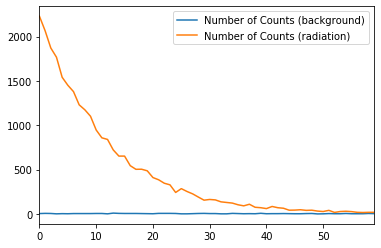

In [0]:
concat_data.plot()

#show the trends of the radiation data

### **Data Analysis of the Barium Radioactivity Data**

In [0]:
# Get the mean background Geiger Count -Nb- , and subtract from the radiation data
Nb = concat_data['Number of Counts (background)'].mean()
mod_bar_data = concat_data['Number of Counts (radiation)']-Nb 

#Uncertainty is calculated from the standard error propagation - sigf = sqrt(Nf-Nb)  -Eq9- --> this is a column
uncertainty = np.sqrt(concat_data['Number of Counts (radiation)']+concat_data['Number of Counts (background)'])

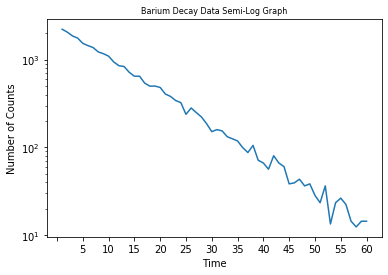

In [0]:
#Generate the log graph of the modified Barium data (not-logged)
plt.plot(rad_data_final['Sample Number'], mod_bar_data)
plt.yscale('log')
plt.title('Barium Decay Data Semi-Log Graph', fontsize=8)
plt.ylabel('Number of Counts')
plt.xlabel('Time')
plt.xticks(np.arange(-1,61,step=5));

The slope (m) and y-intercept (b) of the curve are -0.087989 and 7.826352, respectively



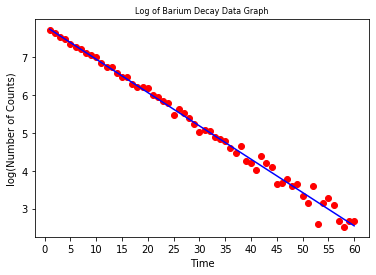

In [0]:
#Gather the y-intercept and slope data (b and m, respectively) of the semi-log curve
#Make arrays
bar_data_list = np.asarray(mod_ces_data.to_list()).astype(float)
samp_num= np.asarray(rad_data_final['Sample Number'].to_list()).astype(int)
log_bar_data = np.log(ces_data_list).astype(float) #take logarithm of the Barium decay data

#Plot Barium Logarithm
plt.plot(samp_num,log_bar_data,'ro')
plt.title('Log of Barium Decay Data Graph', fontsize=8)
plt.ylabel('log(Number of Counts)')
plt.xlabel('Time')
plt.xticks(np.arange(0,61,step=5));

#Generate the Equations
coefs = np.polyfit(samp_num,log_ces_data,1) #generate the m and b values of the curve
poly1d = np.poly1d(coefs) #Function which approximates a log(y) value by intaking x
print('The slope (m) and y-intercept (b) of the curve are %f and %f, respectively\n' %(coefs[0],coefs[1]))

plt.plot(samp_num,poly1d(samp_num),'b')

#The graph shows that the gathering of data was correct
#rad_data_final['Sample Number']

In [0]:
#Since based on the halflife equation, I(t)=Io*e^(-t/tau), and the linear regression above, resolved into log(y)=at+log(yo)
# (-1/tau = a). Therefore, a can be used to find tau and thus approximate the half life

import math

tau = (-1/coefs[0]) #the tau value
half_life = tau*math.log(2)
print('The halflife of Barium is ~ %f' %half_life )

The halflife of Barium is ~ 7.877698


In [0]:
#Looking at the raw data above, at sample number 0 (i.e. time = 0), the count was 2229
#Similarly, looking at sample 8 (i.e. time = 8), the count was 1174, or approximately 52.7% of the initial